In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import random
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Comercial PJ

In [3]:
campos_numericos_com = ['Qtde Ops', 'USD Total', 'MN Tot', 'Taxa Med', 'MN Med', 'USD Med']

df = pd.read_csv('Comercial_J.csv', sep=',', index_col=False)
df.dropna(subset = campos_numericos_com, inplace=True)

scaler = StandardScaler()

df[campos_numericos_com] = scaler.fit_transform(df[campos_numericos_com])

X_2 = df[campos_numericos_com]

In [4]:
from sklearn.cluster import DBSCAN


In [5]:
from itertools import product

eps_values = np.arange(0.25,4,0.125) # eps values to be investigated
min_samples = np.arange(2,15) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [6]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_2)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_2, DBS_clustering.labels_))

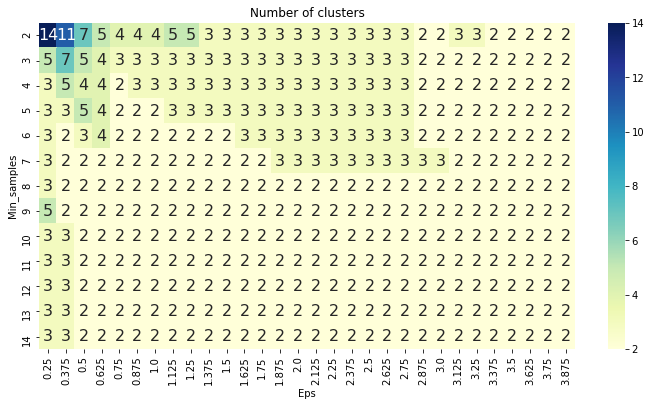

In [7]:
import seaborn as sns

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

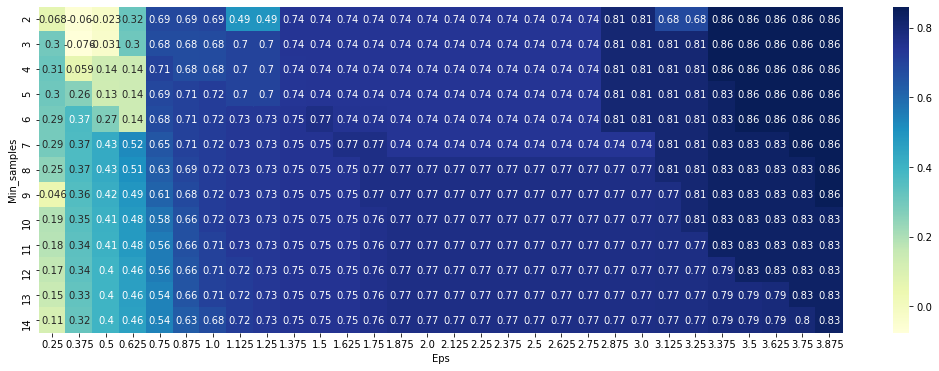

In [8]:

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [9]:
DBS_clustering_2 = DBSCAN(eps=0.75, min_samples=2).fit(X_2)

DBSCAN_clustered_2 = X_2.copy()
DBSCAN_clustered_2.loc[:,'Cluster'] = DBS_clustering_2.labels_ # append labels to points

In [10]:
DBSCAN_clust_sizes_2 = DBSCAN_clustered_2.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes_2.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes_2

,DBSCAN_size
Cluster,
-1,10
0,217
1,4
2,2


# Comercial PF

In [11]:
campos_numericos_com = ['Qtde Ops', 'USD Total', 'MN Tot', 'Taxa Med', 'MN Med', 'USD Med']

df = pd.read_csv('Comercial_F.csv', sep=',', index_col=False)
df.dropna(subset = campos_numericos_com, inplace=True)

scaler = StandardScaler()

df[campos_numericos_com] = scaler.fit_transform(df[campos_numericos_com])

X_3 = df[campos_numericos_com]

In [12]:
from sklearn.cluster import DBSCAN


In [13]:
from itertools import product

eps_values = np.arange(0.25,4,0.125) # eps values to be investigated
min_samples = np.arange(2,15) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [14]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_3)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_3, DBS_clustering.labels_))

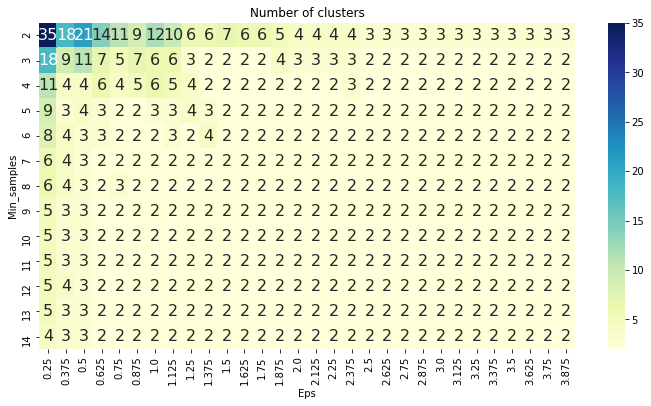

In [15]:
import seaborn as sns

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

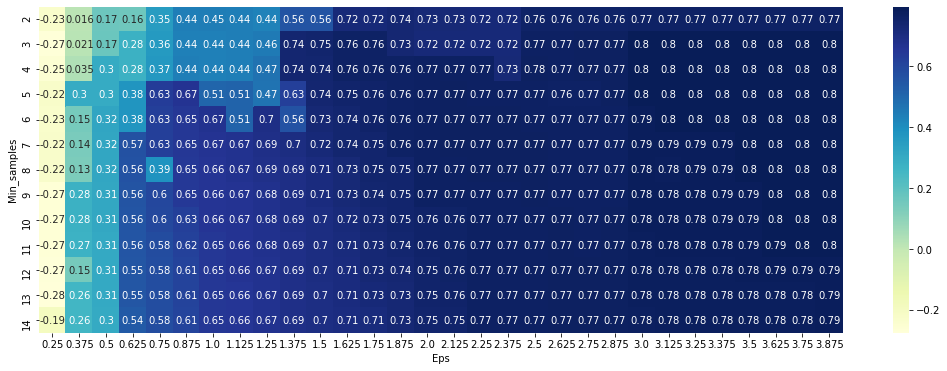

In [16]:

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [19]:
DBS_clustering_3 = DBSCAN(eps=1.625, min_samples=2).fit(X_3)

DBSCAN_clustered_3 = X_3.copy()
DBSCAN_clustered_3.loc[:,'Cluster'] = DBS_clustering_3.labels_ # append labels to points

In [20]:
DBSCAN_clust_sizes_3 = DBSCAN_clustered_3.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes_3.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes_3

,DBSCAN_size
Cluster,
-1,10
0,547
1,2
2,2
3,2
4,2
